# **Data Loading**

In [ ]:
!pip install pandas-profiling[notebook,html]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np    # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
X_full_train = pd.read_csv('/content/Insurance_Train.csv')
X_test_full = pd.read_csv('/content/Insurance_Test.csv')
X_full_train.describe()
X_full_train.head()

id  age          job  marital  education  balance housing loan  \
0  98749   32       admin.   single  secondary       64     yes   no   
1  19550   45  blue-collar  married  secondary      534      no   no   
2  75084   45   technician  married  secondary     1477     yes   no   
3  65715   39   technician  married   tertiary       14      no   no   
4  41412   49  blue-collar   single    unknown     2222      no   no   

    contact month  duration  campaign  pdays  previous poutcome  y  
0   unknown   may       202         2     -1         0  unknown  0  
1  cellular   aug       104         6     -1         0  unknown  0  
2  cellular   nov        75         1    132         1  failure  0  
3  cellular   jan       114         2     -1         0  unknown  0  
4   unknown   jun       114         2     -1         0  unknown  0

In [ ]:
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
profile = ProfileReport(X_full_train, explorative=True, title='Insurance Exploratory Analysis')

# **Data Analysis**

In [ ]:
# profile.to_notebook_iframe()
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

generating heat map to get idea of correlation between various features in the input train data

<ipython-input-56-7a156be925c1>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_full_train.corr(),cbar=True,annot=True,cmap='Blues')


<AxesSubplot: >

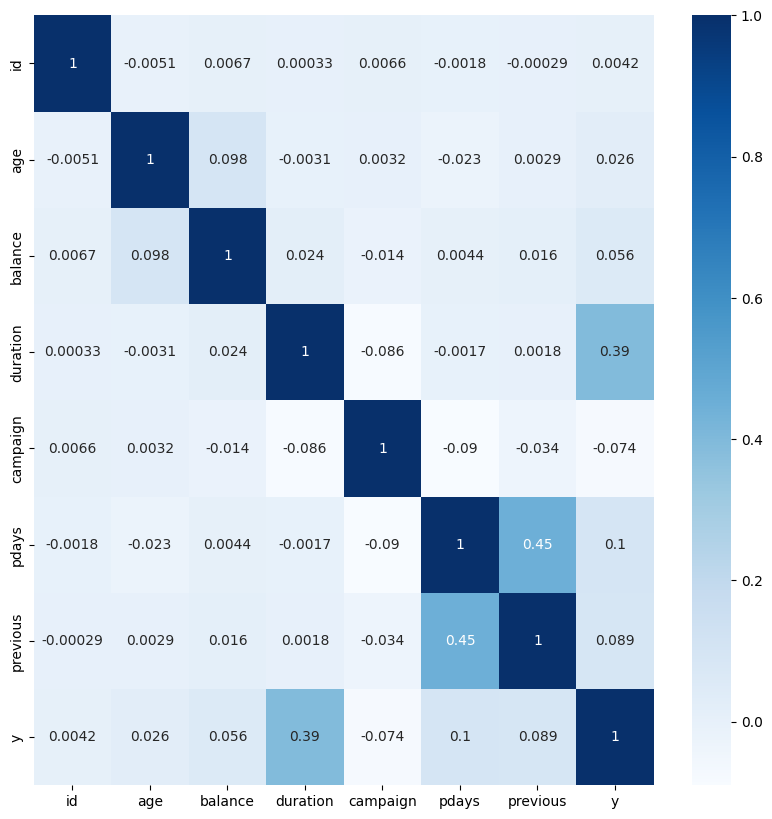

In [ ]:
#FEATURE ENGINEERING WITH CORRELATION MATRIX
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(X_full_train.corr(),cbar=True,annot=True,cmap='Blues')

Inference from above heatmap and profile

1) From the above report, the X_full_train has 15 features and 1 output.

*   Numerical features: {'id',  'age',  'balance',  'duration',  'campaign',  'pdays',  'previous'}

*   Categorical features: {'job', 'marital', 'education', 'contact', 'month', 'poutcome'}

*   Boolean: {'housing','loan'}
*   Output(Categorical): {'y'}

2) The distribution of id is almost uniform.

3) The id is unique to each and every person.

4) Qualititatively id has no inference with y and that is much evident from the heatmap the covariance of y with id is almost zero, so, id is outliers.

5) The p_days and previous are much correlated with each other with a covariance close to 1.

6) So, P_day and previous are so much dependent on each other.

7) The duration, poutcome and month has much correlation with Y so, the y_ value is largely dependent on these features.

8) The people with in age of 30 to 60 are more likely that they will subscribe for term deposit.

9) customers with blue-collar and services job will have enough salary so, they may not apply for term deposit.

10) Potential clients suscribed for term deposits in seasons of fall and winter.

11) housing also a very important factor in determining the output.

12) The data corresponding to previous feature is highly skewed.

13) housing and month are highly correlated.

14) month and contact are also highly correlated.

15) poutcome and previous are also highly correlated features.

16) The output y has 81.7 percent of zeros so, the class y has imbalnce in the values.



# **Data preprocessing**

#### Handling missing values

1) some of the columns might be empty or filled with nan

2) we can handle this missing values by following methods

    1.   dropping features with missing values.

    2.   fill the missing data with mode or mean or median of the following feature.

3) second strategy is the best method because in first method we can loose the importance of one feature.

4) so, filling the missing values with mode of the feature




In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values='unknown',strategy='most_frequent')
imputer.fit_transform(X_full_train)
imputer.fit_transform(X_test_full)

array([[5149, 42, 'admin.', ..., 317, 3, 'failure'],
       [6179, 36, 'admin.', ..., -1, 0, 'failure'],
       [4846, 29, 'blue-collar', ..., -1, 0, 'failure'],
       ...,
       [7780, 39, 'blue-collar', ..., -1, 0, 'failure'],
       [5259, 32, 'self-employed', ..., -1, 0, 'failure'],
       [4973, 54, 'retired', ..., -1, 0, 'failure']], dtype=object)

#### Train_Validation split

1) The x_train is divided into train and validation data with split ratio of 0.9

2) The validation data helps us to find the best training parameters

3) It helps in  handling overfitting and underfitting the data.

In [ ]:
from sklearn.model_selection import train_test_split
X_full_train.dropna(axis=0,subset=['y'],inplace=True)
y = X_full_train.y
X_full_train.drop(['y'],axis=1,inplace=True)
print(X_full_train)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full_train, y, train_size=0.8, test_size=0.2)

          id  age          job  marital  education  balance housing loan  \
0      98749   32       admin.   single  secondary       64     yes   no   
1      19550   45  blue-collar  married  secondary      534      no   no   
2      75084   45   technician  married  secondary     1477     yes   no   
3      65715   39   technician  married   tertiary       14      no   no   
4      41412   49  blue-collar   single    unknown     2222      no   no   
...      ...  ...          ...      ...        ...      ...     ...  ...   
40684  24953   29   technician   single  secondary     3313     yes   no   
40685  34002   59       admin.  married  secondary       92     yes   no   
40686  76035   54  blue-collar  married  secondary      548      no   no   
40687  61279   46  blue-collar  married    primary      258     yes   no   
40688  60013   41     services  married  secondary        0     yes  yes   

         contact month  duration  campaign  pdays  previous poutcome  
0        unknown

#### Handling categorical values

1) we know that some of the features are having categorical values.

2) we know that models cannot handle strings or categorical data.

3) so, we need to assign the numeric values to the categorical columns.

4) The stratagies to handle this categorical columns

    1.  dropping categorical features.

    2.  ordinal encoding.

    3.  one hot encoding.

5) out of the above strategies one hot encoding is the best way of modelling
the categorical columns.

6) One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data.






In [ ]:
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 15 and
                        X_train_full[cname].dtype == "object"]
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)

X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test_copy = X_test.copy()
X_train.head()

id  age  balance  duration  campaign  pdays  previous  job_admin.  \
5677   48044   40      783       171         2     -1         0           1   
30526  31356   48     1403        76         2     -1         0           1   
24659  18713   45     2671        94         4     -1         0           0   
24730  15806   56     -246       461         2    204         2           0   
20011  63545   49      157       131         2     -1         0           0   

       job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  \
5677                 0                 0  ...          0          0   
30526                0                 0  ...          0          0   
24659                0                 0  ...          0          0   
24730                0                 0  ...          0          0   
20011                0                 0  ...          0          0   

       month_may  month_nov  month_oct  month_sep  poutcome_failure  \
5677           1          0          0          0                 0   
30526          0          0          0          0                 0   
24659          0          0          0          0                 0   
24730          0          0          0          0                 1   
20011          0          0          0          0                 0   

       poutcome_other  poutcome_success  poutcome_unknown  
5677                0                 0                 1  
30526               0                 0                 1  
24659               0                 0                 1  
24730               0                 0                 0  
20011               0                 0                 1  

[5 rows x 49 columns]

#### Feature engineering

Feature engineering involves addition, deletion or transformation of features of the data.

Adding new features may give some insights into the data in this way feature engineering helps in more accurate predictions.

From the above profile, we observe that "previous" is highly skewed, so replacing the feature with log of the feature. it makes data unskewed.

From the above profile we observe that "previous" and "pdays" are highly correlated. Then we can add new feature "previous*pdays" to the data.

In [ ]:
# feature engineerinng code
feature1 = X_train['pdays']
feature2 = X_train['previous']
X_train["new_feature"] = feature1*feature2
X_valid["new_feature"] = X_valid["pdays"]*X_valid["previous"]
X_test["new_feature"] = X_test["pdays"]*X_test["previous"]

# performing skewing
X_train['previous_log'] = np.log(X_train['previous'] + 2)
X_valid['previous_log'] = np.log(X_valid['previous'] + 2)
X_test['previous_log'] = np.log(X_test['previous'] + 2)




#### Handling Class Imbalance

1) The train data has 81.7 % of zeros.

2) if you train thee model without any changes than Mostly every classifier gives high weightage for zero.

3) this type of problem is class imbalance.

4) that is imbalance in number of samples  in each categorical output

5) class imbalance can be solved by upsampling / down sampling that is generating new samples from the data to make class balance for the output variable

6) Here we use random oversampler to handle this class imbalance problem.

7) Random Oversampling: Randomly duplicate examples in the minority class.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
OverS = RandomOverSampler()
X_Over, Y_Over = OverS.fit_resample(X_train, y_train)
X_train = X_Over
y_train = Y_Over
print(sum(y_train)/len(y_train))

##creating copies
X_trains = X_train
X_valids = X_valid
X_tests = X_test


0.5


#### Removing outliers

Here we know that id is unique and no way it infuences the output predictions so, this id acts as outliers.

previous has very less correlation with output y.

From the above Feature engineering we unskewed "previous" and added a new featture "previous_log" so now previous might act as an outlier.


In [ ]:
X_train.drop('id',axis = 1)
X_valid.drop('id',axis = 1)
X_test.drop('id',axis = 1)
X_train.drop('previous',axis = 1)
X_valid.drop('previous',axis = 1)
X_test.drop('previous',axis = 1)


id  age  balance  duration  campaign  pdays  job_admin.  \
0     5149   42      734       332         2    317           1   
1     6179   36       22        77         5     -1           1   
2     4846   29        0       215         1     -1           0   
3     3676   46     1114        87         8     -1           0   
4     4256   39      378       127         2     -1           0   
...    ...  ...      ...       ...       ...    ...         ...   
4517  7880   46      174       157         1     -1           0   
4518  2635   29      751       121         2     -1           0   
4519  7780   39     -145      1372         4     -1           0   
4520  5259   32      286       175         1     -1           0   
4521  4973   54     6449       487         1     -1           0   

      job_blue-collar  job_entrepreneur  job_housemaid  ...  month_may  \
0                   0                 0              0  ...          0   
1                   0                 0              0  ...          0   
2                   1                 0              0  ...          1   
3                   0                 0              0  ...          0   
4                   0                 0              0  ...          1   
...               ...               ...            ...  ...        ...   
4517                0                 0              0  ...          1   
4518                0                 0              0  ...          1   
4519                1                 0              0  ...          0   
4520                0                 0              0  ...          0   
4521                0                 0              0  ...          0   

      month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
0             0          0          0                 1               0   
1             0          0          0                 0               0   
2             0          0          0                 0               0   
3             0          0          0                 0               0   
4             0          0          0                 0               0   
...         ...        ...        ...               ...             ...   
4517          0          0          0                 0               0   
4518          0          0          0                 0               0   
4519          0          0          0                 0               0   
4520          0          0          0                 0               0   
4521          0          0          0                 0               0   

      poutcome_success  poutcome_unknown  new_feature  previous_log  
0                    0                 0          951      1.609438  
1                    0                 1            0      0.693147  
2                    0                 1            0      0.693147  
3                    0                 1            0      0.693147  
4                    0                 1            0      0.693147  
...                ...               ...          ...           ...  
4517                 0                 1            0      0.693147  
4518                 0                 1            0      0.693147  
4519                 0                 1            0      0.693147  
4520                 0                 1            0      0.693147  
4521                 0                 1            0      0.693147  

[4522 rows x 50 columns]

# **Model Training and Predictions**

## Model 1: Bayes Classifier

######Training the Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_NB= GaussianNB()
X_full = X_train.append(X_valid,ignore_index = True)
y_full = y_train.append(y_valid,ignore_index = True)
classifier_NB.fit(X_full,y_full)

<ipython-input-63-50e579b05566>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_full = X_train.append(X_valid,ignore_index = True)
<ipython-input-63-50e579b05566>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_full = y_train.append(y_valid,ignore_index = True)


GaussianNB()

######Predicting the Output

In [ ]:
preds_test = classifier_NB.predict(X_test)
output = pd.DataFrame({'id':X_test_copy.id,
                       'y': preds_test})
output.to_csv('submission1.csv', index=False)

Accuracy and confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_NB.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
accuracy = accuracy_score(y_valid, y_pred)
print(f'accuracy = {accuracy}')
print(f'confusion matrix : {cm}')

accuracy = 0.8332514131236176
confusion matrix : [[6281  951]
 [ 406  500]]


## Model 2: Random Forest Classifier

#####Hyper Parameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

# classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)
# # %%time
# classifier_rf.fit(X_train, y_train)

# # checking the oob score
# classifier_rf.oob_score_

# rf = RandomForestClassifier(random_state=42, n_jobs=-1)
# params = {
#     'max_depth': [2,3,5,10,20],
#     'min_samples_leaf': [5,10,20,50,100,200],
#     'n_estimators': [10,25,30,50,100,200]
# }
# from sklearn.model_selection import GridSearchCV
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator=rf,
#                            param_grid=params,
#                            cv = 4,
#                            n_jobs=-1, verbose=1, scoring="accuracy")
# # %%time
# grid_search.fit(X_train, y_train)
# grid_search.best_score_
# rf_best = grid_search.best_estimator_
# rf_best

The above code finds the best parameters for the gradient booster using grid search method.

The best parameters obtained from above hyper parameter tunning are
1. best_n_estimators = 100

2. best_max_depth = 5

The above code is commented because it takes very long time to execute the above code snipet because we need to iterate over several parameter values to find the best using grid search method.

######Training the Model

In [ ]:
best_n_estimators = 100
best_max_depth = 5
classifier_rf = RandomForestClassifier(random_state=42, max_depth=best_max_depth,n_estimators = best_n_estimators, oob_score=True)
X_full = X_train.append(X_valid,ignore_index = True)
y_full = y_train.append(y_valid,ignore_index = True)
classifier_rf.fit(X_full,y_full)

<ipython-input-67-94eca1192a59>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_full = X_train.append(X_valid,ignore_index = True)
<ipython-input-67-94eca1192a59>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_full = y_train.append(y_valid,ignore_index = True)


RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

######Predicting the Output

In [ ]:
preds_test = classifier_rf.predict(X_test)
output = pd.DataFrame({'id':X_test_copy.id,
                       'y': preds_test})
output.to_csv('submission2.csv', index=False)

Accuracy and confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_rf.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
accuracy = accuracy_score(y_valid, y_pred)
print(f'accuracy = {accuracy}')
print(f'confusion matrix : {cm}')

accuracy = 0.8510690587367904
confusion matrix : [[6200 1032]
 [ 180  726]]


## Model 3: Logistic Regression

######Training the Model

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_logi= LogisticRegression(random_state=42)
X_full = X_train.append(X_valid,ignore_index = True)
y_full = y_train.append(y_valid,ignore_index = True)
classifier_logi.fit(X_full,y_full)

<ipython-input-70-dc9bf16140f9>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_full = X_train.append(X_valid,ignore_index = True)
<ipython-input-70-dc9bf16140f9>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_full = y_train.append(y_valid,ignore_index = True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

######Predicting the Output

In [ ]:
preds_test = classifier_logi.predict(X_test)
output = pd.DataFrame({'id':X_test_copy.id,
                       'y': preds_test})
output.to_csv('submission3.csv', index=False)

Accuracy and confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_logi.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
accuracy = accuracy_score(y_valid, y_pred)
print(f'accuracy = {accuracy}')
print(f'confusion matrix : {cm}')

accuracy = 0.7928237896289014
confusion matrix : [[5828 1404]
 [ 282  624]]


## Model 4: Gradient_boosting classifier

#####Hyper Parameter Tuning

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
# parameters = {
#     "n_estimators":[5,50,250,500],
#     "max_depth":[1,3,5,7,9],
#     "learning_rate":[0.01,0.1,1,10,100]
# }

# gbc =  GradientBoostingClassifier()
# cv = GridSearchCV(gbc,parameters,cv=5)
# cv.fit(X_train,y_train.values.ravel())

# def display(results):
#     print(f'Best parameters are: {results.best_params_}')
#     print("\n")
#     mean_score = results.cv_results_['mean_test_score']
#     std_score = results.cv_results_['std_test_score']
#     params = results.cv_results_['params']
#     for mean,std,params in zip(mean_score,std_score,params):
#         print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

# display(cv)
# for i in range(1,10):
#     gradient_booster = GradientBoostingClassifier(learning_rate=0.1,n_estimators = i*100)
#     gradient_booster.fit(X_train,y_train)
#     y_pred = gradient_booster.predict(X_valid)
#     mea = mean_absolute_error(y_valid,y_pred)
#     print(f'{i*100}: {mea}')

The above code finds the best parameters for the gradient booster using grid search method.

The best parameters obtained from above hyper parameter tunning are
1. best_n_estimators = 200

2. best_max_depth = 3

3. best_learning_rate = 0.1

The above code is commented because it takes very long time to execute the above code snipet because we need to iterate over several parameter values to find the best using grid search method.

######Training the Model

In [ ]:
best_n_estimators = 200
best_max_depth = 3
best_learning_rate = 0.1
gradient_booster = GradientBoostingClassifier(learning_rate=best_learning_rate,n_estimators = best_n_estimators,max_depth = best_max_depth)
X_full = X_trains.append(X_valids,ignore_index = True)
y_full = y_train.append(y_valid,ignore_index = True)
gradient_booster.fit(X_full,y_full)

<ipython-input-74-6947198d0a99>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_full = X_trains.append(X_valids,ignore_index = True)
<ipython-input-74-6947198d0a99>:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_full = y_train.append(y_valid,ignore_index = True)


GradientBoostingClassifier(n_estimators=200)

######Predicting the Output

In [ ]:
preds_test = gradient_booster.predict(X_tests)
output = pd.DataFrame({'id':X_test_copy.id,
                       'y': preds_test})
output.to_csv('submission4.csv', index=False)

Accuracy and confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = gradient_booster.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
accuracy = accuracy_score(y_valid, y_pred)
print(f'accuracy = {accuracy}')
print(f'confusion matrix : {cm}')

accuracy = 0.859302039813222
confusion matrix : [[6211 1021]
 [ 124  782]]


# Results

The accuracy and confusion matrix for bayes classifier in validation data is 0.8332514131236176 and [[6281  951]
 [ 406  500]]

The accuracy and confusion matrix for Random forest classifier in validation data is 0.8510690587367904 and [[6200 1032]
 [ 180  726]]

The accuracy and confusion matrix for logistic classifier in validation data is  0.7928237896289014 and  [[5828 1404]
 [ 282  624]]

The accuracy and confusion matrix for gradient boosting classifier in validation data is 0.859302039813222 and [[6211 1021]
 [ 124  782]]


 The kaggle predictions F1 score are as follows:

 bayes classifier: 0.68141

 Random forest classifier: 0.72283

 logistic classifier: 0.6099

 gradient boosting classifier: 0.7724

 so, from the above understanding we can say that gradient boosting classifier outperformed all the classifiers.

so, the best classifier is gradient boodting classifier.